In [53]:
import numpy as np

In [54]:
import pandas as pd

In [55]:
data = pd.read_excel('d:/shiran.xlsx')

In [56]:
data2 = data.ClosePrice

In [57]:
T=10
D=1
X=[]
Y=[]

In [58]:
for t in range(len(data2)-T):
    x = data2[t:t+T]
    X.append(x)
    y= data2[t+T]
    Y.append(y)

In [59]:
X= np.array(X).reshape(-1,T,1)

In [60]:
Y= np.array(Y)

In [61]:
N= len(X)

In [62]:
from tensorflow.keras.layers import Dense, Input, SimpleRNN

In [63]:
from tensorflow.keras.models import Model

In [64]:
i = Input(shape = (T,1))
x = SimpleRNN(10, activation =None)(i)
x = Dense(1)(x)
model = Model(i,x)

In [65]:
model.compile(optimizer = 'adam', loss = 'mse')

In [66]:
r = model.fit(

X[:-N//2], Y[:-N//2],
epochs = 80,
validation_data=(X[-N//2:], Y[-N//2:])    


)

Epoch 1/80
6/6 [==============================] - 1s 59ms/step - loss: 363796896.0000 - val_loss: 498227296.0000
Epoch 2/80
6/6 [==============================] - 0s 13ms/step - loss: 158127152.0000 - val_loss: 174096496.0000
Epoch 3/80
6/6 [==============================] - 0s 12ms/step - loss: 45950152.0000 - val_loss: 25688182.0000
Epoch 4/80
6/6 [==============================] - 0s 12ms/step - loss: 5105866.0000 - val_loss: 3812761.0000
Epoch 5/80
6/6 [==============================] - 0s 12ms/step - loss: 6316541.5000 - val_loss: 22315414.0000
Epoch 6/80
6/6 [==============================] - 0s 12ms/step - loss: 10665735.0000 - val_loss: 15620371.0000
Epoch 7/80
6/6 [==============================] - 0s 12ms/step - loss: 5435393.5000 - val_loss: 3123923.2500
Epoch 8/80
6/6 [==============================] - 0s 15ms/step - loss: 1883667.1250 - val_loss: 1489907.6250
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 2128834.5000 - val_loss: 2931568.7500
Epoch 

6/6 [==============================] - 0s 12ms/step - loss: 1384177.1250 - val_loss: 954403.1875
Epoch 76/80
6/6 [==============================] - 0s 12ms/step - loss: 1377869.8750 - val_loss: 950350.9375
Epoch 77/80
6/6 [==============================] - 0s 12ms/step - loss: 1373974.5000 - val_loss: 948194.5000
Epoch 78/80
6/6 [==============================] - 0s 11ms/step - loss: 1369927.7500 - val_loss: 943278.1875
Epoch 79/80
6/6 [==============================] - 0s 12ms/step - loss: 1364654.1250 - val_loss: 938199.5000
Epoch 80/80
6/6 [==============================] - 0s 12ms/step - loss: 1358949.2500 - val_loss: 935955.1875


In [67]:
validation_prediction = []

In [68]:
validation_target = Y[-N//2:]

In [69]:
lastx = X[-N//2]

In [70]:
while len(validation_prediction) < len(validation_target):
    p = model.predict(lastx.reshape(1,-1,1))[0,0]
    validation_prediction.append(p)
    lastx = np.roll(lastx, -1)
    lastx[-1]=p

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 20ms/step


In [71]:
import matplotlib.pyplot as plt

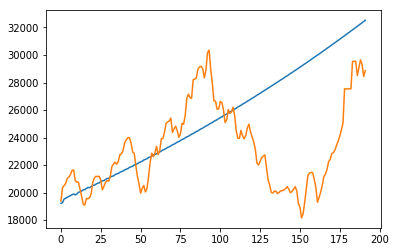

In [72]:
plt.plot(validation_prediction)
plt.plot(validation_target)

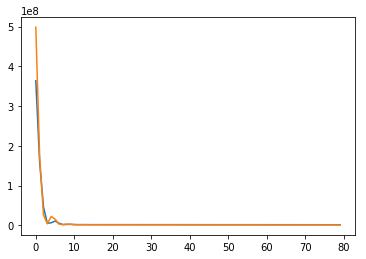

In [73]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
